In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category= DeprecationWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier




In [ ]:
def read_data(train_data, test_data):

  train_data = pd.read_csv(train_data)
  test_data = pd.read_csv(test_data)

  combine_df = train_data.append(test_data, ignore_index = True, sort = False)

  return train_data,test_data,combine_df

In [ ]:
train_data,test_data,combine_df = read_data('Dataset/train.csv','Dataset/test.csv')

In [ ]:
train_data.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


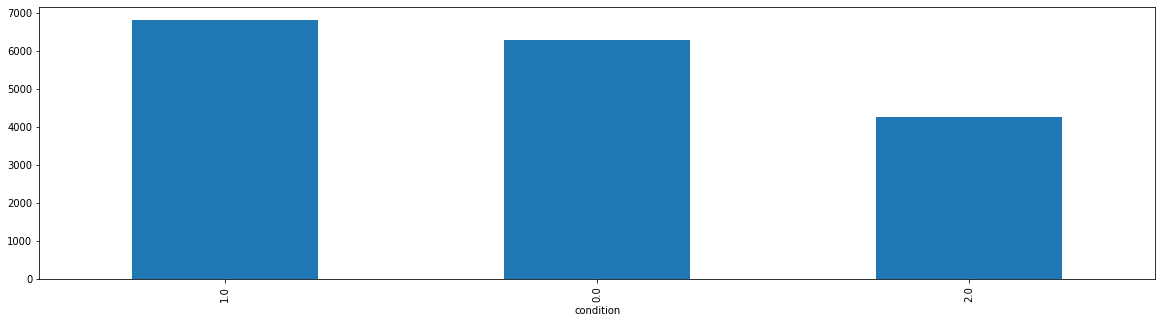

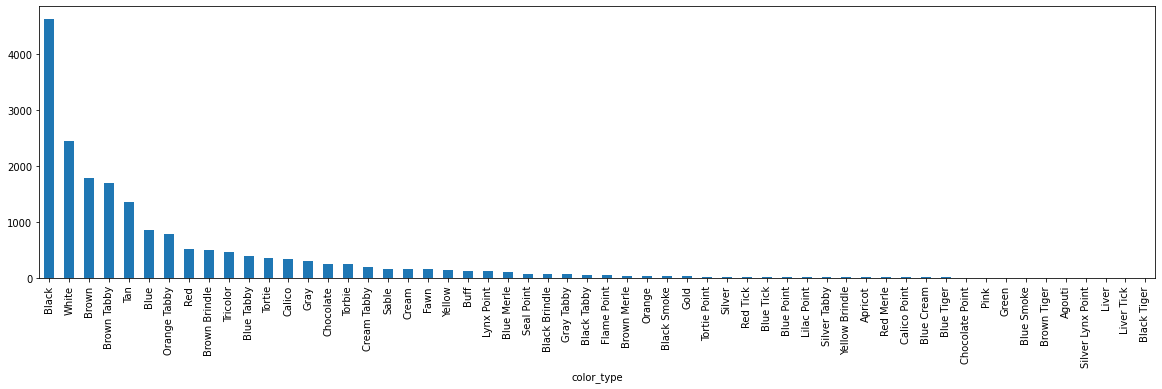

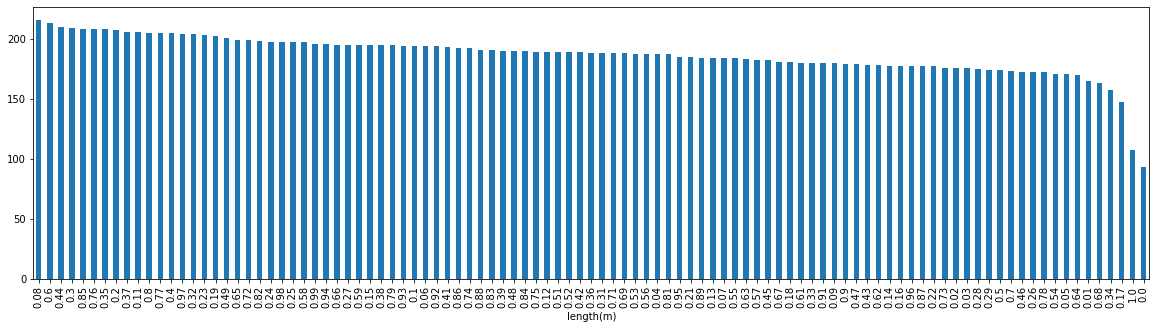

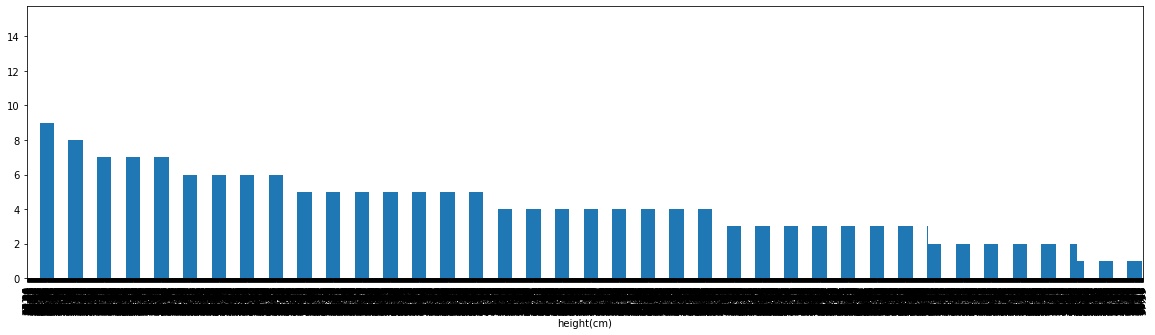

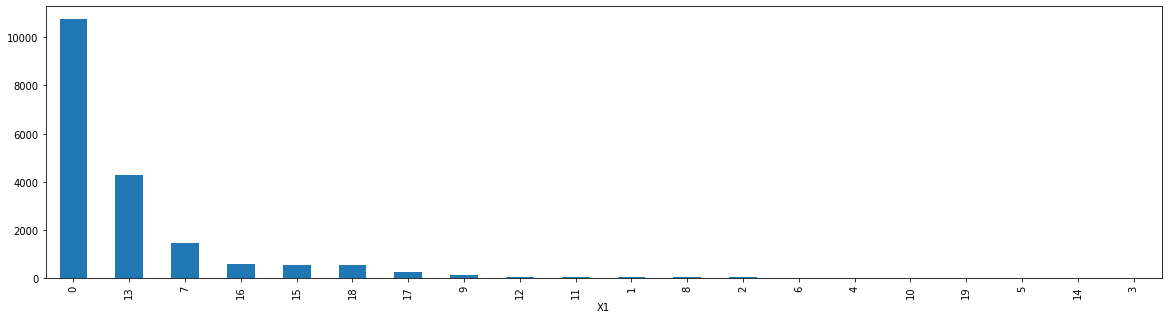

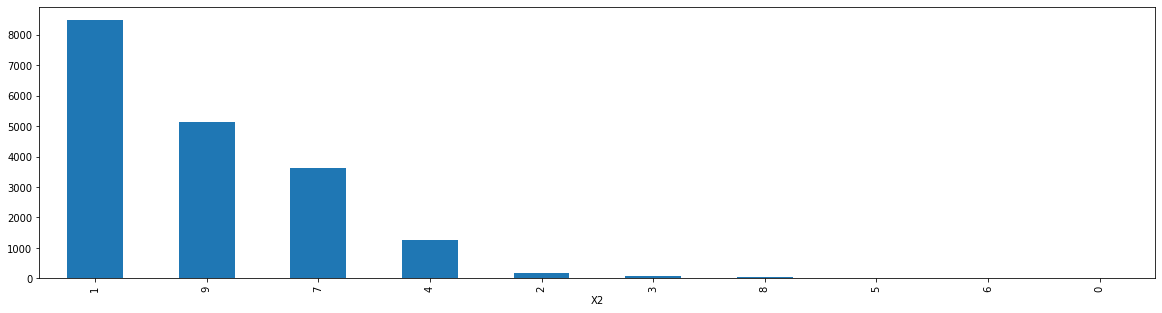

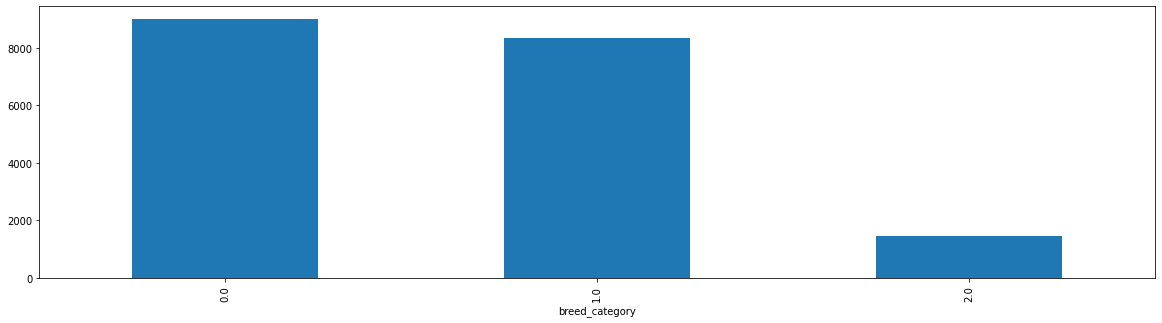

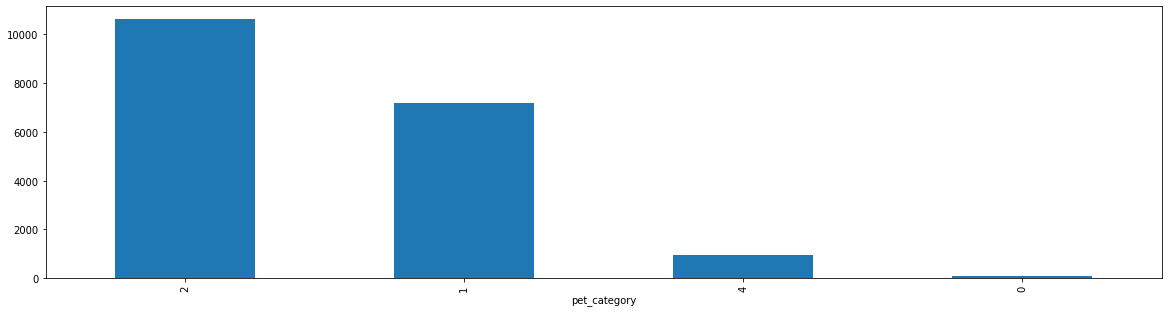

In [ ]:
# train_data.pet_category.value_counts().plot(by='breed_category' ,kind='bar')
# train_data.breed_category.value_counts().plot(kind='bar')
cols = train_data.columns

# cols
for col in cols[3:]:
  plt.figure(figsize=(20,5))
  train_data[col].value_counts().plot(kind='bar')
  plt.xlabel(col)


# train_data.hist(column='pet_category',by='breed_category')


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pet_id        8072 non-null   object 
 1   issue_date    8072 non-null   object 
 2   listing_date  8072 non-null   object 
 3   condition     7453 non-null   float64
 4   color_type    8072 non-null   object 
 5   length(m)     8072 non-null   float64
 6   height(cm)    8072 non-null   float64
 7   X1            8072 non-null   int64  
 8   X2            8072 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 567.7+ KB


In [ ]:
train_data.select_dtypes('number').columns

Index(['condition', 'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')

In [ ]:
train_data.select_dtypes('object').columns

Index(['pet_id', 'issue_date', 'listing_date', 'color_type'], dtype='object')

In [ ]:
train_data.shape

# train_data.isnull().sum()

(18834, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder
def preprocessing(df):

  le = LabelEncoder()

  df.condition.fillna(df.condition.mean(),inplace = True)

  df['color_type_enc'] = le.fit_transform(df["color_type"])

  # df.dropna(axis=0,how='any',inplace=True)

  print("Nulls in each column:", df.isnull().sum())

  # df['DATE'] = pd.to_datetime(df.issue_date)

  # df['day'] = df.DATE.dt.day

  # df['month'] = df.DATE.dt.month

  # df['year'] = df.DATE.dt.year

  df = df.drop(columns = ['listing_date','issue_date','color_type'],inplace = False)


  return df


In [ ]:
from sklearn.preprocessing import LabelEncoder
def test_preprocessing(df):

  le = LabelEncoder()

  df['color_type_enc'] = le.fit_transform(df["color_type"])

  df.condition.fillna(df.condition.mean(),inplace=True)

  print("Nulls in each column:", df.isnull().sum())

  # df['DATE'] = pd.to_datetime(df.issue_date)

  # df['day'] = df.DATE.dt.day

  # df['month'] = df.DATE.dt.month

  # df['year'] = df.DATE.dt.year

  df = df.drop(columns = ['listing_date','issue_date','color_type'],inplace = False)

  # df.fillna(df.mean(),inplace = True)

  return df


In [ ]:
train_data = preprocessing(train_data)
test_data = test_preprocessing(test_data)

Nulls in each column: pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
breed_category    0
pet_category      0
color_type_enc    0
dtype: int64
Nulls in each column: pet_id            0
issue_date        0
listing_date      0
condition         0
color_type        0
length(m)         0
height(cm)        0
X1                0
X2                0
color_type_enc    0
dtype: int64


In [ ]:
train_data.head()

,pet_id,condition,length(m),height(cm),X1,X2,breed_category,pet_category,color_type_enc
0,ANSL_69903,2.00000,0.80,7.78,13,9,0.0,1,18
1,ANSL_66892,1.00000,0.72,14.19,13,9,0.0,2,53
2,ANSL_69750,0.88339,0.15,40.90,15,4,2.0,4,15
3,ANSL_71623,1.00000,0.62,17.82,0,1,0.0,2,53
4,ANSL_57969,2.00000,0.50,11.06,18,4,0.0,1,2


In [ ]:
test_data.head()

,pet_id,condition,length(m),height(cm),X1,X2,color_type_enc
0,ANSL_75005,0.0,0.87,42.73,0,7,2
1,ANSL_76663,1.0,0.06,6.71,0,1,36
2,ANSL_58259,1.0,0.24,41.21,0,7,2
3,ANSL_67171,1.0,0.29,8.46,7,1,2
4,ANSL_72871,1.0,0.71,30.92,0,7,14


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# y = train_data[['breed_category','pet_category']]
y = train_data[['breed_category']]
y1 = train_data[['pet_category']]

x = train_data.drop(columns=['breed_category','pet_category'])


In [ ]:
x = train_data.drop(columns=['pet_id','breed_category','pet_category'])

In [ ]:
x.head()

,condition,length(m),height(cm),X1,X2,color_type_enc
0,2.00000,0.80,7.78,13,9,18
1,1.00000,0.72,14.19,13,9,53
2,0.88339,0.15,40.90,15,4,15
3,1.00000,0.62,17.82,0,1,53
4,2.00000,0.50,11.06,18,4,2


In [ ]:
# x.color_type.value_counts()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x,y,test_size = 0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# breed_model =  RandomForestClassifier()

# breed_model =  xgb.XGBClassifier()
breed_model =  GradientBoostingClassifier()

breed_model.fit(X_train,y_train)
# print(breed_model.feature_importances_)

# print(classification_report(y_val, breed_model.predict(X_val)))

preds_breed = breed_model.predict(test_data.drop(columns=['pet_id']))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x,y1,test_size = 0.3)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# cat_model =  RandomForestClassifier()

# cat_model =  xgb.XGBClassifier()

cat_model =  GradientBoostingClassifier()

cat_model.fit(X_train,y_train)

# print(cat_model.feature_importances_)

print(classification_report(y_val, cat_model.predict(X_val)))

preds_cat = cat_model.predict(test_data.drop(columns=['pet_id']))


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.33      0.23      0.27        22
           1       0.89      0.79      0.84      2156
           2       0.86      0.94      0.90      3187
           4       0.89      0.73      0.80       286

    accuracy                           0.87      5651
   macro avg       0.74      0.67      0.70      5651
weighted avg       0.87      0.87      0.87      5651



In [ ]:
submission =  pd.DataFrame({'pet_id':test_data['pet_id'],'breed_category':preds_breed,'pet_category':preds_cat})
submission.to_csv('sub5.csv',index=0)